<a href="https://colab.research.google.com/github/GustavoMiguel28/ML---Classificacao---AVC/blob/main/Avalia%C3%A7%C3%A3o_T%26F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Carregar o arquivo CSV para um DataFrame

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

In [ ]:
#Lendo arquivo csv
df = pd.read_csv('Dados_vendas.csv', 
                 sep=';', 
                 header=0, 
                 encoding='latin-1')

In [ ]:
#Visualizando os dados obtidos
df.head()

,Produto,Região,Período,Quantidade vendida,Valor vendido
0,Tênis,São Paulo,jan/21,650,243750
1,Tênis,São Paulo,fev/21,680,255000
2,Tênis,São Paulo,mar/21,700,262500
3,Tênis,São Paulo,abr/21,750,281250
4,Tênis,São Paulo,mai/21,710,266250


In [ ]:
#Verificando as colunas do dataframe
df.columns

Index(['Produto', 'Região', 'Período', 'Quantidade vendida', 'Valor vendido'], dtype='object')

In [ ]:
#Verificando o tamanho (linhas) do dataframe
df.shape[0]

144

##Calcular o total de vendas para cada produto em cada região

In [ ]:
#Agrupando as vendas por produtos
df_agrupado_produto = df.groupby(['Produto'])['Valor vendido'].sum().reset_index()
df_agrupado_produto.head(6)

,Produto,Valor vendido
0,Camiseta,10296900
1,Shorts,5663130
2,Tênis,12871125


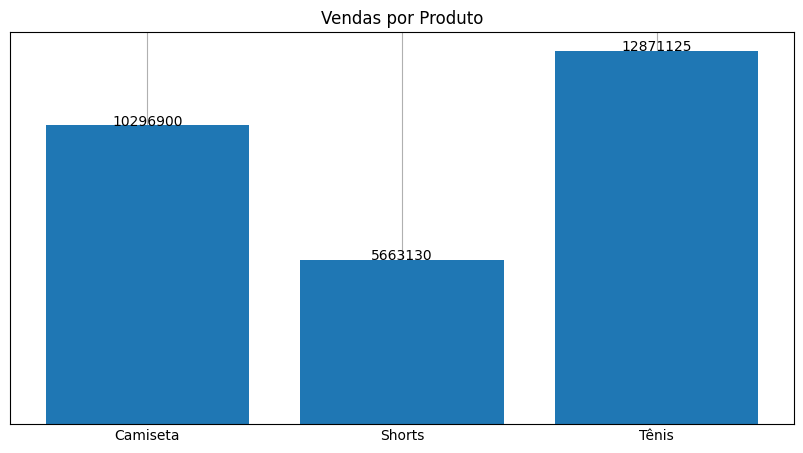

In [ ]:
fig, ax = plt.subplots(figsize=[8, 4])

plt.title('Vendas por Produto')

x = df_agrupado_produto['Produto']
y = df_agrupado_produto['Valor vendido']

ax.bar(x, y, label='Valor vendido')

for i, valor in enumerate(df_agrupado_produto['Valor vendido']):
    plt.text(i, valor, str(valor), ha='center')

ax.yaxis.set_visible(False)

plt.show()

In [ ]:
#Agrupando as vendas por produtos e regiões
df_agrupado_produto_regiao = df.groupby(['Produto', 'Região'])['Valor vendido'].sum().reset_index()
df_agrupado_produto_regiao.head(6)

,Produto,Região,Valor vendido
0,Camiseta,Rio de Janeiro,3860700
1,Camiseta,São Paulo,6436200
2,Shorts,Rio de Janeiro,2123220
3,Shorts,São Paulo,3539910
4,Tênis,Rio de Janeiro,4825875
5,Tênis,São Paulo,8045250


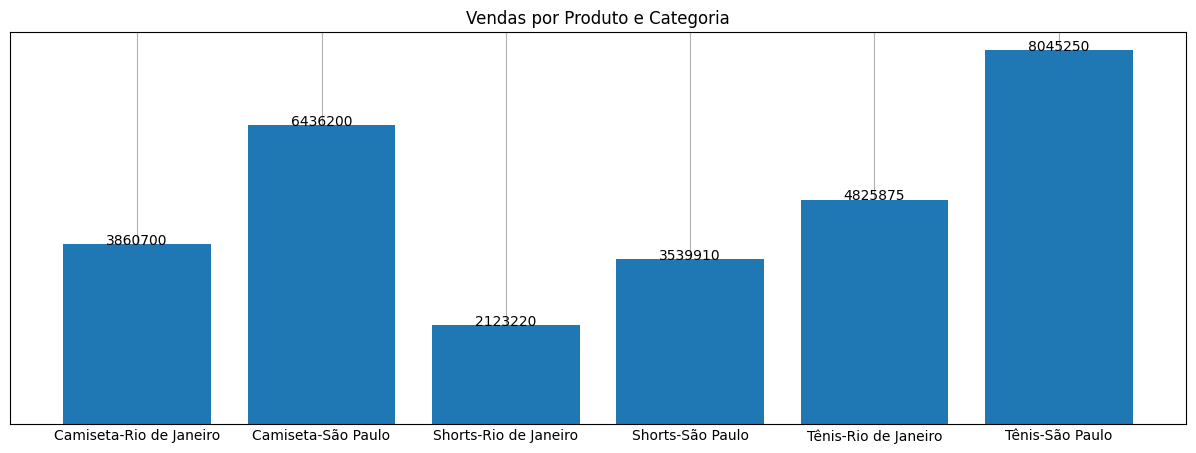

In [ ]:
fig, ax = plt.subplots(figsize=[12, 4])

plt.title('Vendas por Produto e Categoria')

x = df_agrupado_produto_regiao['Produto'] + '-' + df_agrupado_produto_regiao['Região']
y = df_agrupado_produto_regiao['Valor vendido']

plt.bar(x, y)

for i, valor in enumerate(df_agrupado_produto_regiao['Valor vendido']):
    plt.text(i, valor, str(valor), ha='center')

ax.yaxis.set_visible(False)

plt.show()

##Calcular o total de vendas para cada produto em cada mês e ano

In [ ]:
#Agrupando os produtos pelo mês/ano
df_agrupado_produto_periodo = df.groupby(['Produto', 'Período'])['Valor vendido'].sum().reset_index()
df_agrupado_produto_periodo.head(72)

,Produto,Período,Valor vendido
0,Camiseta,abr/21,360000
1,Camiseta,abr/22,432000
2,Camiseta,ago/21,389700
3,Camiseta,ago/22,467400
4,Camiseta,dez/21,624000
...,...,...,...
67,Tênis,nov/22,648000
68,Tênis,out/21,522000
69,Tênis,out/22,626250
70,Tênis,set/21,504000


In [ ]:
#Agrupando os produtos pelo ano
df['Ano'] = df['Período'].apply(lambda x: '20' + x[-2:])
df_agrupado_produto_periodo_ano = df.groupby(['Produto', 'Ano'])['Valor vendido'].sum().reset_index()
df_agrupado_produto_periodo_ano.head(6)

,Produto,Ano,Valor vendido
0,Camiseta,2021,4680900
1,Camiseta,2022,5616000
2,Shorts,2021,2574440
3,Shorts,2022,3088690
4,Tênis,2021,5851125
5,Tênis,2022,7020000


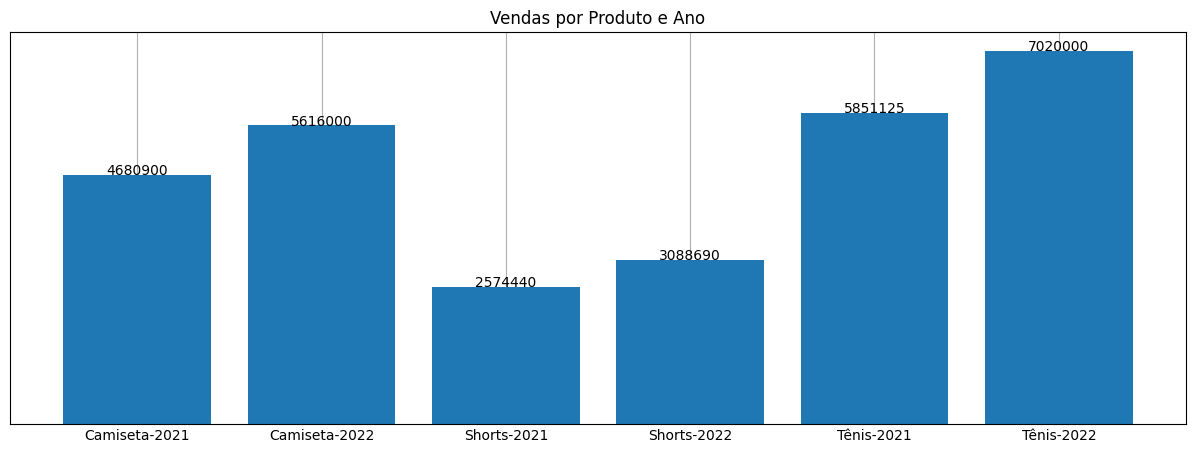

In [ ]:
fig, ax = plt.subplots(figsize=[12, 4])

plt.title('Vendas por Produto e Ano')

x = df_agrupado_produto_periodo_ano['Produto'] + '-' + df_agrupado_produto_periodo_ano['Ano']
y = df_agrupado_produto_periodo_ano['Valor vendido']

plt.bar(x, y)

for i, valor in enumerate(df_agrupado_produto_periodo_ano['Valor vendido']):
    plt.text(i, valor, str(valor), ha='center')

ax.yaxis.set_visible(False)

plt.show()

##Identificar o produto mais vendido em cada região e em cada mês e ano.

In [ ]:
list_regioes = ['São Paulo', 'Rio de Janeiro']

for regiao in list_regioes:
  df_regiao = df.loc[df['Região'] == regiao]
  df_agrupado_produto_regiao_esp = df_regiao.groupby(['Produto', 'Região'])['Valor vendido'].sum().reset_index()
  df_agrupado_produto_regiao_esp = df_agrupado_produto_regiao_esp.sort_values('Valor vendido', ascending=False)
  produto_max = df_agrupado_produto_regiao_esp['Produto'].iloc[0]
  valor_max = df_agrupado_produto_regiao_esp['Valor vendido'].iloc[0]
  print(f'Região: {regiao}, Produto mais vendido: {produto_max}, Valor vendido: {valor_max}')

Região: São Paulo, Produto mais vendido: Tênis, Valor vendido: 8045250
Região: Rio de Janeiro, Produto mais vendido: Tênis, Valor vendido: 4825875


In [ ]:
list_anos = ['2021', '2022']

for ano in list_anos:
  df_ano = df.loc[df['Ano'] == ano]
  df_agrupado_produto_ano_esp = df_ano.groupby(['Produto', 'Ano'])['Valor vendido'].sum().reset_index()
  df_agrupado_produto_ano_esp = df_agrupado_produto_ano_esp.sort_values('Valor vendido', ascending=False)
  produto_max = df_agrupado_produto_ano_esp['Produto'].iloc[0]
  valor_max = df_agrupado_produto_ano_esp['Valor vendido'].iloc[0]
  print(f'Ano: {ano}, Produto mais vendido: {produto_max}, Valor vendido: {valor_max}')

Ano: 2021, Produto mais vendido: Tênis, Valor vendido: 5851125
Ano: 2022, Produto mais vendido: Tênis, Valor vendido: 7020000


###Identificar a região com mais vendas para cada produto

In [ ]:
#Agrupando os produtos pelo mês/ano
df_tenis = df.loc[df['Produto'] == 'Tênis']
df_tenis_agrupado_regiao = df.groupby(['Região'])['Valor vendido'].sum().reset_index()
df_tenis_agrupado_regiao.head(72)

,Região,Valor vendido
0,Rio de Janeiro,10809795
1,São Paulo,18021360


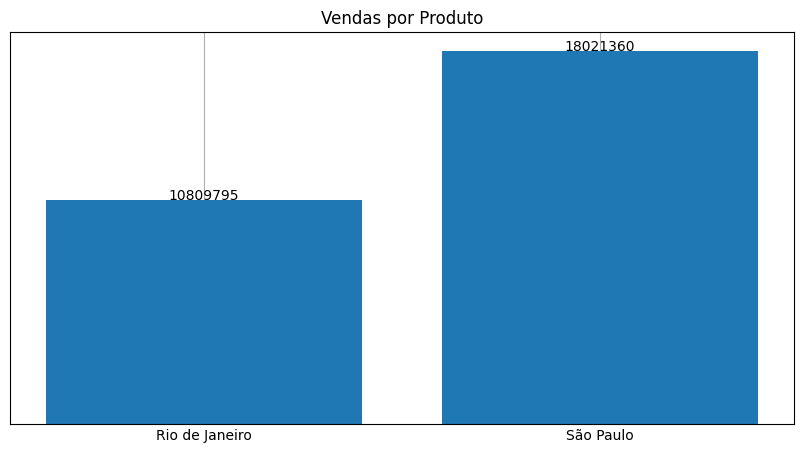

In [ ]:
fig, ax = plt.subplots(figsize=[8, 4])

plt.title('Vendas por Produto')

x = df_tenis_agrupado_regiao['Região']
y = df_tenis_agrupado_regiao['Valor vendido']

ax.bar(x, y, label='Valor vendido')

for i, valor in enumerate(df_tenis_agrupado_regiao['Valor vendido']):
    plt.text(i, valor, str(valor), ha='center')

ax.yaxis.set_visible(False)

plt.show()

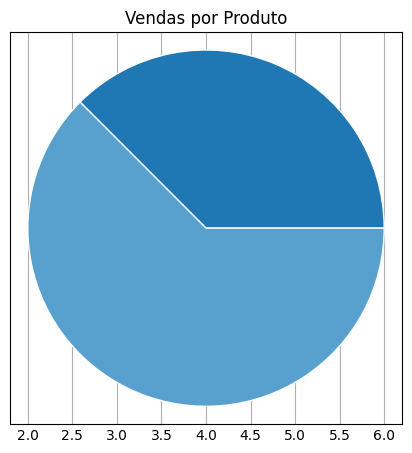

In [ ]:
fig, ax = plt.subplots(figsize=[8, 4])

plt.title('Vendas por Produto')

x = df_tenis_agrupado_regiao['Região']
y = df_tenis_agrupado_regiao['Valor vendido']

ax.pie(y, radius=2, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.yaxis.set_visible(False)

plt.show()